In [1]:
#!/usr/bin/python

__author__ = 'Elliot Simon'
__email__ = 'ellsim@dtu.dk'
__date__ = 'August 02, 2018'
__credits__ = ["DTU-Risø"]

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
import glob

In [3]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['savefig.dpi'] = 500

In [4]:
%matplotlib notebook

# File Input

In [12]:
%%time
# Reads all reconstructed 50m data in folder
path =r'E:\LASCAR\brise\processed_data\50m_data_hdf'
all_files = glob.glob(path + "/*.hdf")
all_files.sort()
print('Number of files = ' + str(len(all_files)))
for file in all_files:
    print(file)
df_ws = pd.concat((pd.read_hdf(f, 'df') for f in all_files))

Number of files = 33
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-10-06_08-25-36_to_2017-10-11_01-38-54_DBS_Brise_Reconstructed_50m_RG.hdf
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-10-19_13-44-59_to_2017-11-01_08-14-47_DBS_Brise_Reconstructed_50m_RG.hdf
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-11-01_08-40-21_to_2017-11-01_13-11-18_DBS_Brise_Reconstructed_50m_RG.hdf
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-11-02_12-20-38_to_2017-11-02_15-58-05_DBS_Brise_Reconstructed_50m_RG.hdf
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-11-10_14-40-57_to_2017-11-13_13-35-49_DBS_Brise_Reconstructed_50m_RG.hdf
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-11-13_13-51-56_to_2017-11-14_11-43-35_DBS_Brise_Reconstructed_50m_RG.hdf
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-11-14_15-39-03_to_2017-11-15_15-58-06_DBS_Brise_Reconstructed_50m_RG.hdf
E:\LASCAR\brise\processed_data\50m_data_hdf\2017-11-15_15-59-00_to_2017-11-16_06-49-31_DBS_Brise_Reconstructed_50m_RG.hdf
E:\

# Processing

In [37]:
# Ensure that dataset is sorted by time
df_ws.sort_index(inplace=True)

<IPython.core.display.Javascript object>


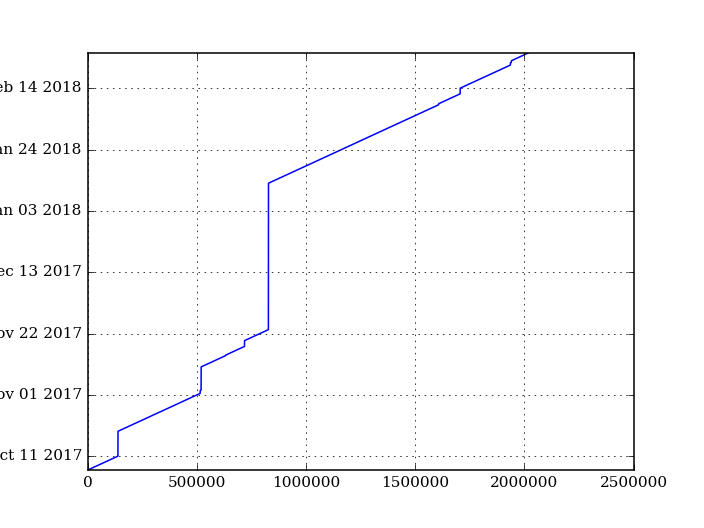

In [38]:
# Check time evolution
plt.plot(df_ws.index)

In [39]:
# Total length of dataset
df_ws.last_valid_index() - df_ws.first_valid_index()

Timedelta('142 days 19:48:47')

In [40]:
# Number of valid days
(len(df_ws.resample('1 min').mean().dropna()) / 60) / 24

63.456250000000004

<IPython.core.display.Javascript object>


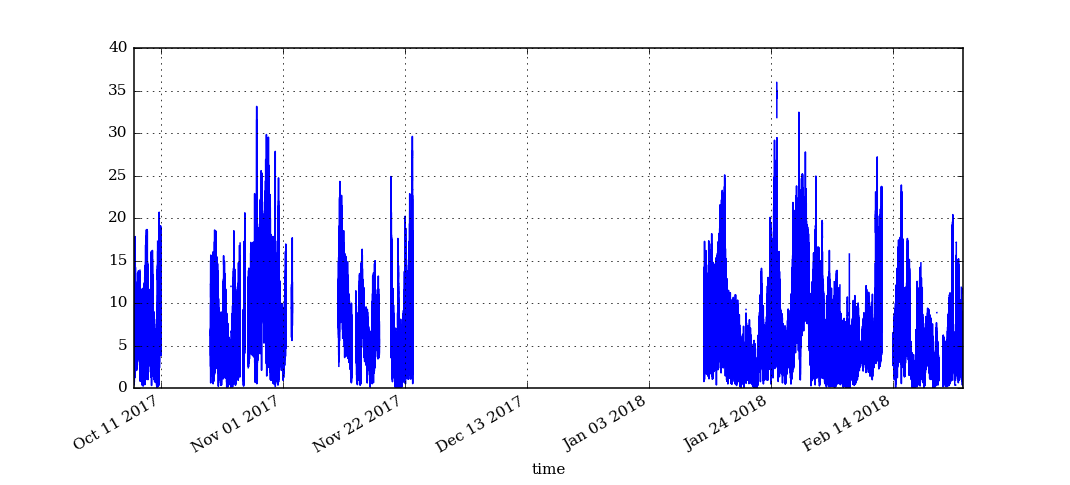

In [41]:
df_ws['wsp'].plot()

<IPython.core.display.Javascript object>


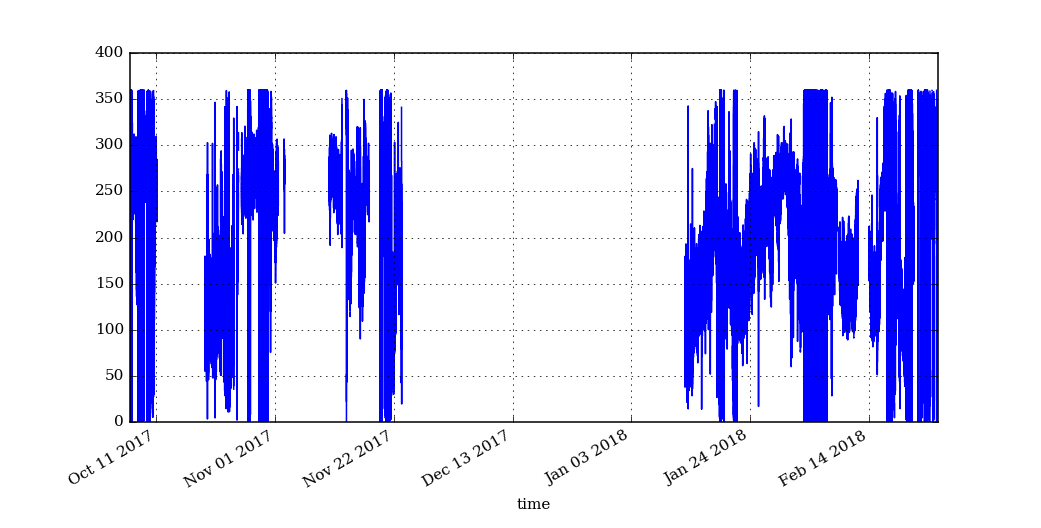

In [42]:
df_ws['wdir'].plot()

# Check against some mast data

In [45]:
# Read in already prepared mast-dataset
df_13s = pd.read_hdf('df_joined_13s_Nov14_15.hdf','df')
print(df_13s.shape)
# Last one is partial scan we want to toss away
df_13s = df_13s.iloc[0:-1]
print(df_13s.shape)

(3271, 409)
(3270, 409)


In [49]:
# Shift mast data back 1 hour to match lidar timestamps
df_13s = df_13s.shift(freq='-1H')

<IPython.core.display.Javascript object>


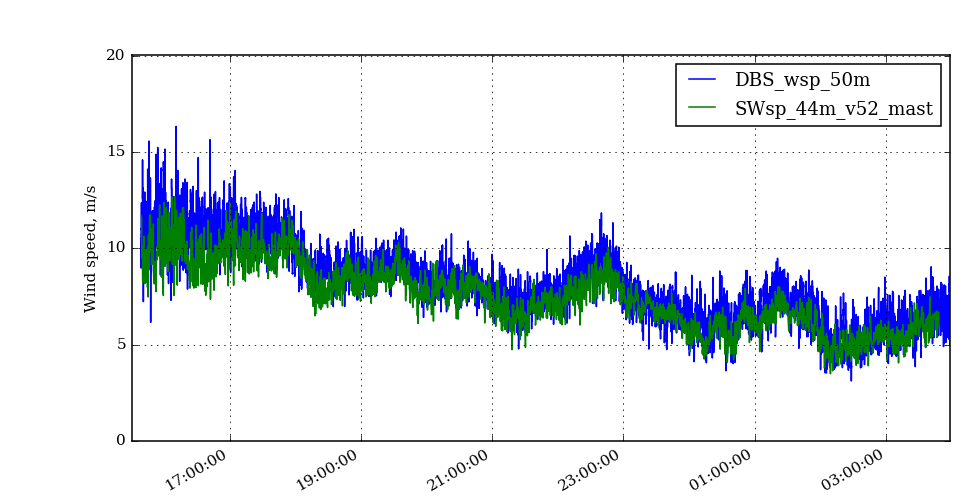

In [53]:
df_ws['wsp'].plot(label='DBS_wsp_50m')
df_13s['SWsp_44m'].plot(label='SWsp_44m_v52_mast')
plt.ylabel('Wind speed, m/s')
plt.legend()

In [54]:
plt.savefig('DBS_vs_mast_sonic.png')

<IPython.core.display.Javascript object>


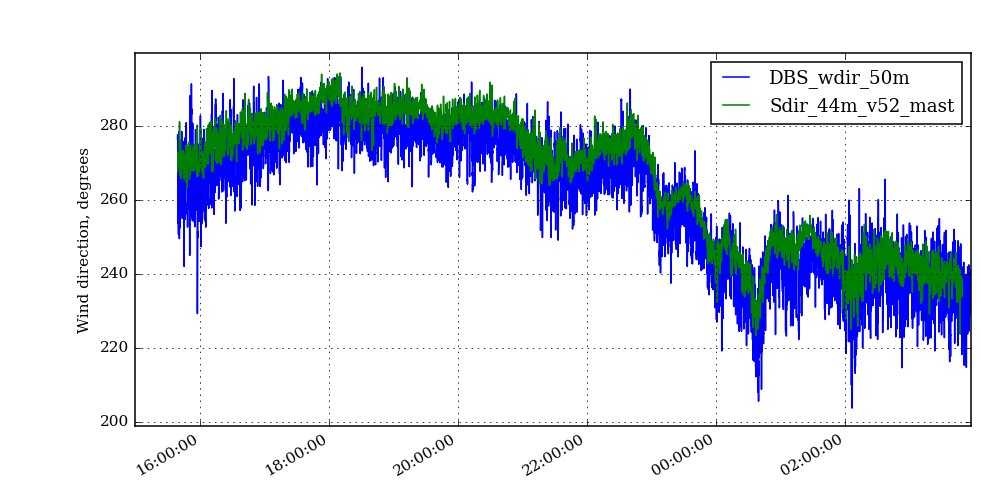

In [58]:
df_ws['wdir'].plot(label='DBS_wdir_50m')
df_13s['Sdir_44m'].plot(label='Sdir_44m_v52_mast')
plt.ylabel('Wind direction, degrees')
plt.legend()

In [59]:
plt.savefig('DBS_vs_mast_sonic_direction.png')

<IPython.core.display.Javascript object>


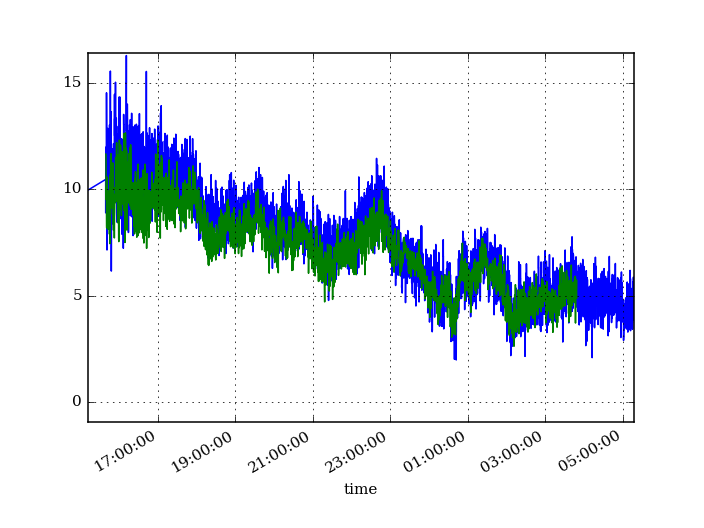

In [55]:
df_ws['u'].plot()
df_13s['u_44m'].plot()

<IPython.core.display.Javascript object>


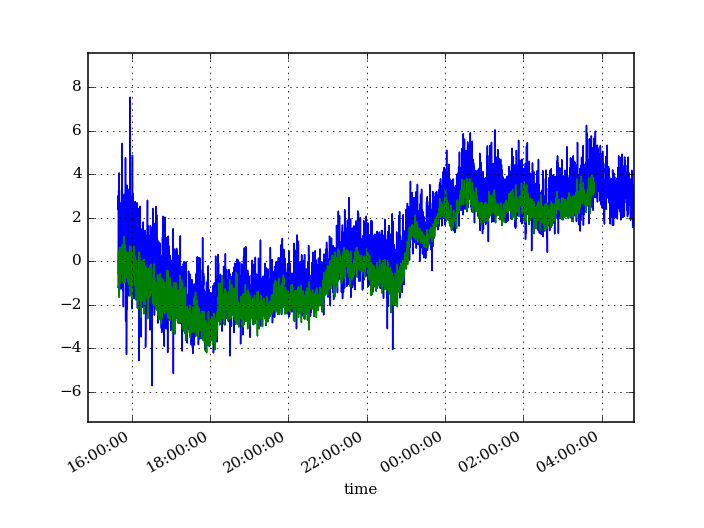

In [56]:
df_ws['v'].plot()
df_13s['v_44m'].plot()

<IPython.core.display.Javascript object>


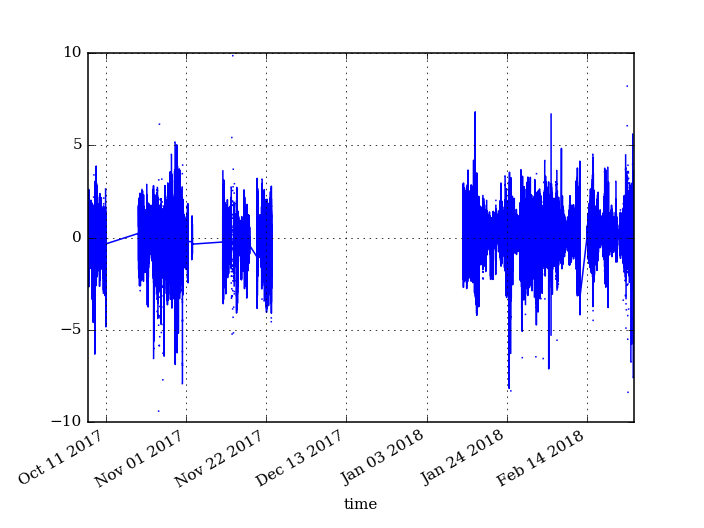

In [57]:
df_ws['w'].plot()

# File output

In [60]:
df_ws.to_hdf('Brise_DBS_50m_dataset_all_LASCAR.hdf', 'df', mode='w', complib='blosc')